In [187]:
#importing important modules and functions
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

import numpy.random as rand

In [188]:
##Part C
##Take three premade datasets and find the Maximum Likelihood (ML) estimators for the relative amplitude (a) of each, with errors.

In [189]:
infile = open('fnl_sample_1.dat')    # open the file for reading
lines = infile.readlines()         # save the file to an array of lines
x1 = []                            # initialize an array x1
for line in lines:
    x1.append(float(line.split()[0]))
    
x1=np.asarray(x1)

In [190]:
infile = open('fnl_sample_2.dat')    
lines = infile.readlines()         
x2 = []                            
for line in lines:
    x2.append(float(line.split()[0]))
    
x2=np.asarray(x2)

In [191]:
infile = open('fnl_sample_3.dat')    
lines = infile.readlines()         
x3 = []                            
for line in lines:
    x3.append(float(line.split()[0]))
    
x3=np.asarray(x3)

In [192]:
#Here we define the nLLH function for the signal+BG PDF for each dataset

def nLLH1(a):
    return -np.sum( np.log( (3./8.)*a*((1. + x1)**2)  + ((1./6.)*(1.-a)*(3.-x1)) ))

In [193]:
def nLLH2(a):
    return -np.sum( np.log( (3./8.)*a*((1. + x2)**2)  + ((1./6.)*(1.-a)*(3.-x2)) ))

In [194]:
def nLLH3(a):
    return -np.sum( np.log( (3./8.)*a*((1. + x3)**2)  + ((1./6.)*(1.-a)*(3.-x3)) ))

In [195]:
#This finds the MLE for the first experiment by minimizing the nLLH

bf1 = optimize.minimize( lambda a: nLLH1(a),[0.1],bounds=[(0.0,1.0)])

print bf1.x[0]

0.159511540148


In [196]:
#Use this to find the error bounds

a1 = np.arange(0.0,0.4,0.001)

yx1 = []

for i in range (0,len(a1)):
    yx1.append(nLLH1(a1[i]))
    
yx = np.asarray(yx1)
    

error1 = []    
    
for i in range(0,len(a1)):
    if (np.abs(yx[i] - min(yx+0.5)) < 0.005):
        error1.append(a1[i])
    
print error1

[0.028000000000000001, 0.30199999999999999]


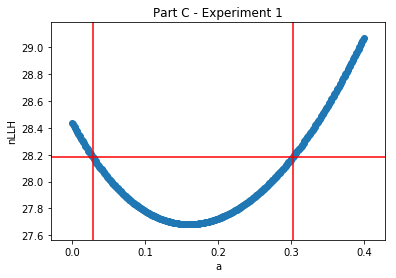

In [214]:
#Showing errors graphically
plt.clf()
plt.axhline(nLLH1(bf1.x[0])+0.5,color='red')
plt.axvline(error1[0],color='red')
plt.axvline(error1[1],color='red')
plt.scatter(a1,yx1)
plt.xlabel("a")
plt.ylabel("nLLH")
plt.title("Part C - Experiment 1")
plt.savefig("Final_nLLH-C1")
plt.show() 

In [198]:
#Simply printing the MLE and the size of the errors

print "The estimated value of a1 is", "%.3g" % bf1.x[0]
print
print "The left-hand error is", "%.3g" % (bf1.x[0] - error1[0])
print
print "The right-hand side error is", "%.3g" % (error1[1] - bf1.x[0])

The estimated value of a1 is 0.16

The left-hand error is 0.132

The right-hand side error is 0.142


In [199]:
#Repeat above for Experiment #2
bf2 = optimize.minimize( lambda a: nLLH2(a),[0.4])

print bf2.x[0]

0.403402353391


In [200]:
#Use this to find the error bounds

a2 = np.arange(0.1,0.7,0.001)

yx2 = []

for i in range (0,len(a2)):
    yx2.append(nLLH2(a2[i]))
    
yx = np.asarray(yx2)
    

error2 = []    
    
for i in range(0,len(a2)):
    if (np.abs(yx[i] - min(yx+0.5)) < 0.003):
        error2.append(a2[i])
    
print error2

[0.24900000000000014, 0.55300000000000038]


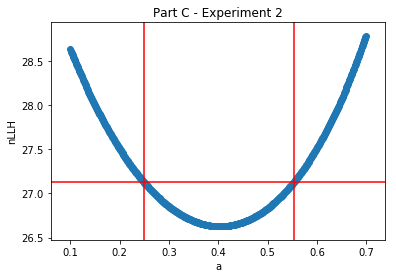

In [215]:
#Showing errors graphically
plt.clf()
plt.axhline(nLLH2(bf2.x[0])+0.5,color='red')
plt.axvline(error2[0],color='red')
plt.axvline(error2[1],color='red')
plt.scatter(a2,yx2)
plt.xlabel("a")
plt.ylabel("nLLH")
plt.title("Part C - Experiment 2")
plt.savefig("Final_nLLH-C2")
plt.show() 

In [202]:
print "The estimated value of a2 is", "%.3g" % bf2.x[0]
print
print "The left-hand error is", "%.3g" % (bf2.x[0] - error2[0])
print
print "The right-hand side error is", "%.3g" % (error2[1] - bf2.x[0])

The estimated value of a2 is 0.403

The left-hand error is 0.154

The right-hand side error is 0.15


In [203]:
#Repeat above for Experiment #3
bf3 = optimize.minimize( lambda a: nLLH3(a),[0.6])

print bf3.x[0]

0.583783270206


In [204]:
#Use this to find the error bounds

a3 = np.arange(0.3,0.9,0.001)

yx3 = []

for i in range (0,len(a3)):
    yx3.append(nLLH3(a3[i]))
    
yx = np.asarray(yx3)
    

error3 = []    
    
for i in range(0,len(a3)):
    if (np.abs(yx[i] - min(yx+0.5)) < 0.003):
        error3.append(a3[i])
    
print error3

[0.4260000000000001, 0.72600000000000042]


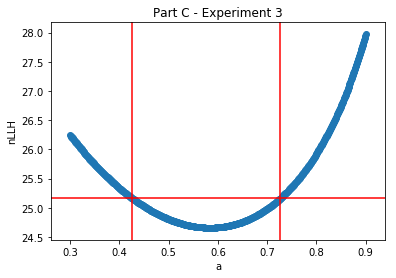

In [216]:
#Showing errors graphically
plt.clf()
plt.axhline(nLLH3(bf3.x[0])+0.5,color='red')
plt.axvline(error3[0],color='red')
plt.axvline(error3[1],color='red')
plt.scatter(a3,yx3)
plt.xlabel("a")
plt.ylabel("nLLH")
plt.title("Part C - Experiment 3")
plt.savefig("Final_nLLH-C3")
plt.show() 

In [20]:
print "The estimated value of a3 is", "%.3g" % bf3.x[0]
print
print "The left-hand error is", "%.3g" % (bf3.x[0] - error3[0])
print
print "The right-hand side error is", "%.3g" % (error3[1] - bf3.x[0])

The estimated value of a3 is 0.584

The left-hand error is 0.158

The right-hand side error is 0.142


In [21]:
##Part D
##Finding the test statistic as defined in a previous part in order to
##indicate which measurement could claim the presence of a signal

In [22]:
#Calculating the test statistic, based upon written derivation
def TS(a):
        return -np.sum(np.log( (1./6.)*(3.-x) )) + np.sum( np.log( (3./8.)*a*((1. + x1)**2)  + ((1./6.)*(1.-a)*(3.-x1)) ))

In [23]:
#Calculating the test statistic for each dataset
x = x1

print TS(bf1.x[0])

0.754454192031


In [24]:
x = x2

print TS(bf2.x[0])

1.23876703408


In [25]:
x = x3

print TS(bf3.x[0])

-0.445970055253


In [26]:
##Part E
##Determine a confidence belt to allow us to extract the 68.3% confidence level intervals for measurements 2 and 3
##

In [30]:
#Define new nLLH for confidence interval plotting
def nLLH_e(a):
    return -np.sum( np.log( (3./8.)*a*((1. + x)**2)  + ((1./6.)*(1.-a)*(3.-x)) ))

C:\Users\Colin Hancock\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


mean is 0.500606542061
standard deviation is 0.0284014301511
Upper limit is  0.529
Lower limit is  0.472


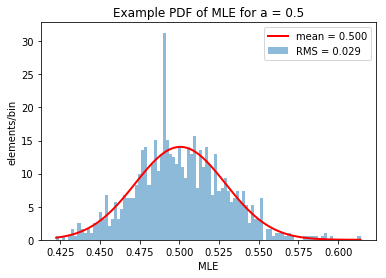

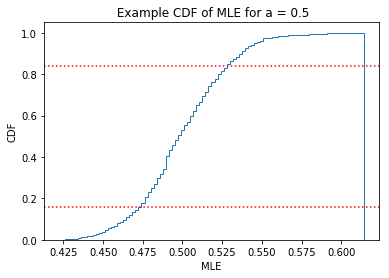

In [183]:
#defines array for PDF values
MLE_array = []


for i in range(0,1000):
    #This lets us set an MLE to generate a PDF around
    a_e = 0.50
    
    n1 = np.random.uniform(0,1,1000)
    n2 = np.random.uniform(0,1,1000)
    
    z = np.random.uniform(0,1,1000)
    
    #These are the inverse CDF's for this distribution
    g1 = 2.*n1**(1./3.)-1.
    g2 = 3. + -1.*np.sqrt(16. - 12.*n2)
    
    #This assigns values from either the signal or BG distributions according to the given a-value
    array=[]
    for i in range(1000):
        if z[i]<=a_e:
            array.append(g1[i])
        else :
            array.append(g2[i])
    
    #Renames array for easy use in nLLH function
    x = np.asarray(array)
    
    #Redundant definition, helps to have it inside loop
    def nLLH_e(a):
        return -np.sum( np.log( (3./8.)*a*((1. + x)**2)  + ((1./6.)*(1.-a)*(3.-x)) ))
    
    #Finds MLE for each possible a-value
    bf_e = optimize.minimize(lambda a: nLLH_e(a),[0.49], bounds = [(0.001, 1.0)])
    #Attempt to fix odd spike in data, probably an issue with the log function
    if bf_e.x[0] > (a_e-0.1):
        MLE_array.append(bf_e.x[0])


#This calculates the mean and std dev for the given PDF
n,bins= np.histogram(MLE_array,bins=100)
midp = 0.5*(bins[1:] + bins[:-1])
mu = np.average(midp, weights=n)
var = np.average((midp - mu)**2, weights=n)
sigma = var**0.5
print "mean is", mu
print "standard deviation is", sigma

#This yields the upper and lower interval limits for the given MLE
upper = mu+sigma
lower = mu-sigma

print "Upper limit is ", "%.3g" % upper
print "Lower limit is ", "%.3g" % lower

plt.clf()

#This plots the histogram for the generated PDF
plt.hist(MLE_array, bins=100, normed = True,alpha=0.5)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.xlabel("MLE")
plt.ylabel("elements/bin")
plt.title("Example PDF of MLE for a = 0.5")
plt.legend(["mean = 0.500","RMS = 0.029"],loc=1)
plt.savefig("Final_PDF.png")
plt.show()

#This plots the CDF with the probability cutoffs listed for 68.3% confidence shown
plt.hist(MLE_array, bins=100, normed = True, cumulative=True, histtype ="step")
plt.xlabel("MLE")
plt.ylabel("CDF")
plt.title(" Example CDF of MLE for a = 0.5")
plt.axhline(y=0.1585, color='r', linestyle=":")
plt.axhline(y=0.8415, color='r', linestyle=":")
plt.savefig("Final_CDF.png")
plt.show()

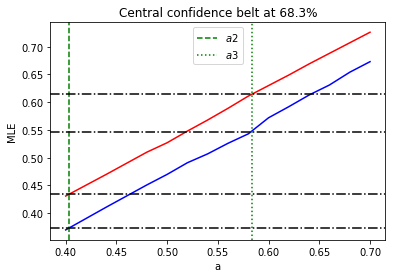

In [164]:
#This array contains the values of 'a' used to generate the PDF's
#Mostly taken in intervals of 0.02, though broader jumps were used from 0.4-0.5
a_arr = [0.4,0.44,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7]

#This lists the upper bounds of the confidence band
uplim = [0.431,0.470,0.510,0.527,0.548,0.568,0.589,0.611,0.630,0.649,0.669,0.688,0.707,0.726]
#This lists the lower bounds of the confidence band
lolim = [0.370,0.411,0.451,0.470,0.491,0.507,0.526,0.543,0.572,0.592,0.613,0.631,0.654,0.673]

#This plots the confidence band, along with the measured MLE's for 2 and 3, with the intervals marked by horizontal lines
plt.clf()
plt.plot(a_arr,lolim, color='blue')
plt.plot(a_arr, uplim, color='red')
a2 = 0.403
a3 = 0.584
plt.axvline(x=a2, color = 'g', linestyle="--", label="$a2$")
plt.axvline(x=a3, color = 'g', linestyle=":", label="$a3$")
plt.axhline(0.435, color = '0', linestyle="-.")
plt.axhline(0.374, color = '0', linestyle="-.")
plt.axhline(0.547, color = '0', linestyle="-.")
plt.axhline(0.614, color = '0', linestyle="-.")
plt.xlabel("a")
plt.ylabel("MLE")
plt.title("Central confidence belt at 68.3%")
plt.legend(loc=0)
plt.savefig("Final_Belt.png")
plt.show()


In [41]:
##Part F
##Combining the data from experiments 2 and 3 to extract a more precise measurement.

#This combines the datasets for 2+3
xF = np.concatenate((x2,x3), axis=0)
print xF


[ 0.0896  0.6082 -0.5793  0.8512  0.9413  0.1865 -0.8927  0.9924 -0.5711
  0.6341  0.683  -0.0924  0.3378  0.8055  0.8044 -0.7987  0.2672  0.5723
  0.0031  0.9634  0.2656 -0.7905  0.2674  0.7069  0.0417 -0.7062 -0.2608
 -0.6876 -0.0127 -0.1657  0.3894 -0.3105  0.4279 -0.501  -0.2047  0.3524
  0.4845  0.9189  0.2981 -0.9583  0.3862 -0.2841  0.395  -0.8548 -0.6169
  0.9373 -0.0283  0.7267  0.8083  0.3567 -0.1685  0.6145  0.019  -0.1687
  0.968  -0.2788  0.8508  0.6044  0.2135  0.6753  0.9308  0.7056  0.4935
  0.3715  0.3064  0.9384  0.6143  0.5051 -0.3962 -0.6753  0.4208  0.3898
  0.119  -0.7565 -0.2114  0.0472  0.5798  0.5585 -0.0153 -0.7256]


In [35]:
#Mostly same method as before
def nLLH_F(a):
    return -np.sum( np.log( (3./8.)*a*((1. + xF)**2)  + ((1./6.)*(1.-a)*(3.-xF)) ))

In [36]:
bf_f = optimize.minimize( lambda a: nLLH_F(a),[0.5],bounds=[(0.0,1.0)])

print bf_f.x[0]

0.489722519344


In [37]:
aF = np.arange(0.2,0.8,0.001)

yxF = []

for i in range (0,len(aF)):
    yxF.append(nLLH_F(aF[i]))
    
yx = np.asarray(yxF)
    

errorF = []    
    
for i in range(0,len(aF)):
    if (np.abs(yx[i] - min(yx+0.5)) < 0.004):
        errorF.append(aF[i])
    
print errorF


[0.37900000000000017, 0.59500000000000042]


In [38]:
print nLLH_F(bf_f.x[0])
print bf_f.x[0]

51.6309609833
0.489722519344


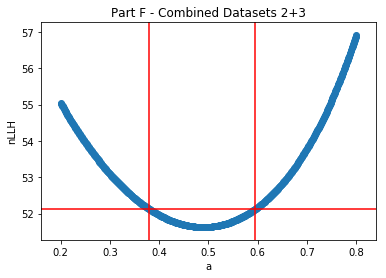

In [217]:
#Showing errors graphically
plt.clf()
plt.axhline(nLLH_F(bf_f.x[0])+0.5,color='red')
plt.axvline(errorF[0],color='red')
plt.axvline(errorF[1],color='red')
plt.scatter(aF,yxF)
plt.xlabel("a")
plt.ylabel("nLLH")
plt.title("Part F - Combined Datasets 2+3")
plt.savefig("Final_nLLH-F")
plt.show() 

In [177]:
print "The estimated value of a is", "%.3g" % bf_f.x[0]
print
print "The left-hand error is", "%.3g" % (bf_f.x[0] - errorF[0])
print
print "The right-hand side error is", "%.3g" % (errorF[1] - bf_f.x[0])

The estimated value of a is 0.49

The left-hand error is 0.111

The right-hand side error is 0.105


In [166]:
##Part G
##Use the results from Part C for experiments 2 and 3 (only reported MLE's) to extract a more 
##precise measurement of the relative amplitude

#Constructing the new nLLH given the asymmetric errors
def nLLK_G(a):
    return 0.5*((a-0.403)**2)/(0.0231 + 0.004*(a-0.403)) + 0.5*((a-0.584)**2)/(0.0224 + 0.016*(a-0.584))

bf_G = optimize.minimize( lambda a: nLLK_G(a),[0.5])

print bf_G

      fun: 0.36784463029803227
 hess_inv: array([[1]])
      jac: array([  3.00630927e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([ 0.50022153])


In [173]:
#Repeat of above, finding error limits for this nLLK

aG = np.arange(0.2,0.8,0.001)

yxG = []

for i in range (0,len(aG)):
    yxG.append(nLLK_G(aG[i]))
    
yx = np.asarray(yxG)
    

errorG = []    
    
for i in range(0,len(aG)):
    if (np.abs(yx[i] - min(yx+0.5)) < 0.0045):
        errorG.append(aG[i])
    
print errorG

[0.40000000000000019, 0.60600000000000032]


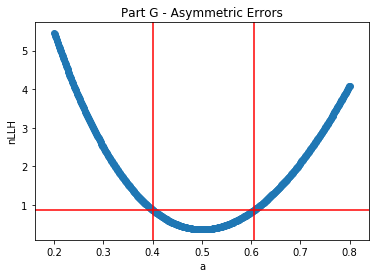

In [218]:
#Showing errors graphically
plt.clf()
plt.axhline(nLLK_G(bf_G.x[0])+0.5,color='red')
plt.axvline(errorG[0],color='red')
plt.axvline(errorG[1],color='red')
plt.scatter(aG,yxG)
plt.xlabel("a")
plt.ylabel("nLLH")
plt.title("Part G - Asymmetric Errors")
plt.savefig("Final_nLLH-G")
plt.show() 

In [176]:
print "The estimated value of a is", "%.3g" % bf_G.x[0]
print
print "The left-hand error is", "%.3g" % (bf_G.x[0] - errorG[0])
print
print "The right-hand side error is", "%.3g" % (errorG[1] - bf_G.x[0])

The estimated value of a is 0.5

The left-hand error is 0.1

The right-hand side error is 0.106
